In [1]:
library(readxl)
library(dplyr)
library(ggplot2)
library(RColorBrewer)

customer_r <- read_excel("customer_r.xlsx")
reservation_r <- read_excel("reservation_r.xlsx")
order_info_r <- read_excel("order_info_r.xlsx")
item_r <- read_excel("item_r.xlsx")
colnames(customer_r) <- tolower(colnames(customer_r))
colnames(reservation_r) <- tolower(colnames(reservation_r))
colnames(order_info_r) <- tolower(colnames(order_info_r))
colnames(item_r) <- tolower(colnames(item_r))

Warning message:
"package 'readxl' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [3]:
my_first_cook <- order_info_r %>% 
            mutate(reserv_month = substr(reserv_no, 1, 6)) %>% # 계산 후 열을 생성
            group_by(item_id, reserv_month) %>% # 그룹 생성
            summarise(avg_sales = mean(sales)) %>% # 요약
            arrange(item_id, reserv_month) # 정리

`summarise()` has grouped output by 'item_id'. You can override using the `.groups` argument.


In [4]:
head(my_first_cook)

item_id,reserv_month,avg_sales
M0001,201906,48000.00
M0001,201907,68000.00
M0001,201908,56000.00
M0001,201909,66000.00
M0001,201910,92000.00
M0001,201911,68307.69


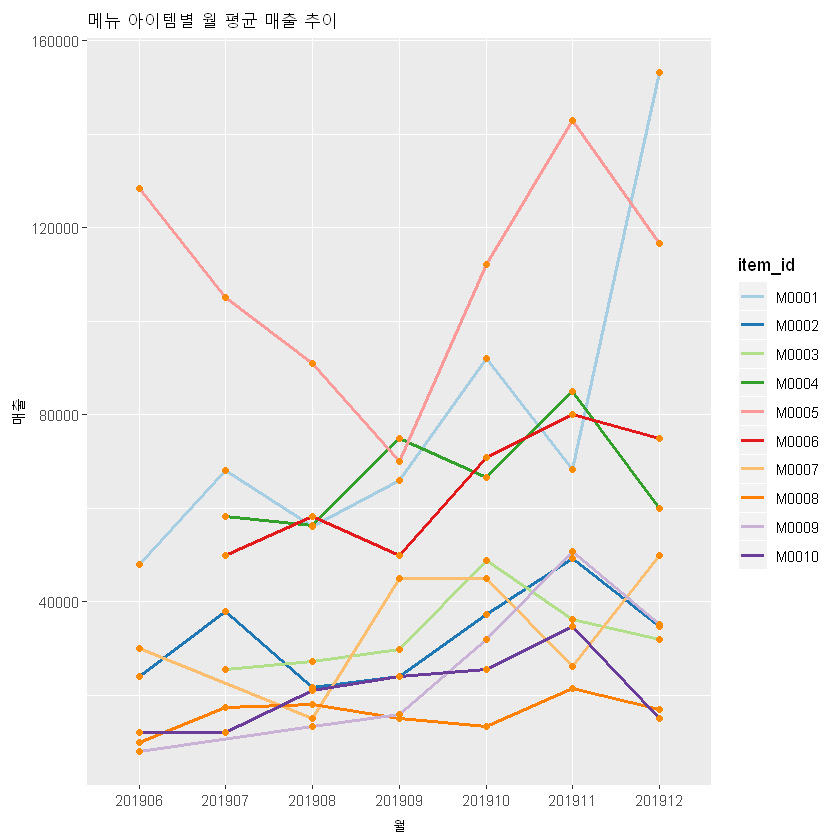

In [5]:
ggplot(my_first_cook, aes(reserv_month, avg_sales, group = item_id, color = item_id)) +
geom_line(size = 1) +
geom_point(color = "darkorange", size = 1.5) +
scale_color_brewer(palette = "Paired") +
labs(title = "메뉴 아이템별 월 평균 매출 추이", x ="월", y = "매출")

In [ ]:
weight <- c(74, 66, 61, 59, 70)
mean(weight) # 평균 = sum(weight) / n
median(weight) # 중앙값 middle num
var(weight) # 분산 (편차 = mean - weight, 분산 = sum(편차^2) / (n-1) )
sd(weight) # 표준편차 root(분산)

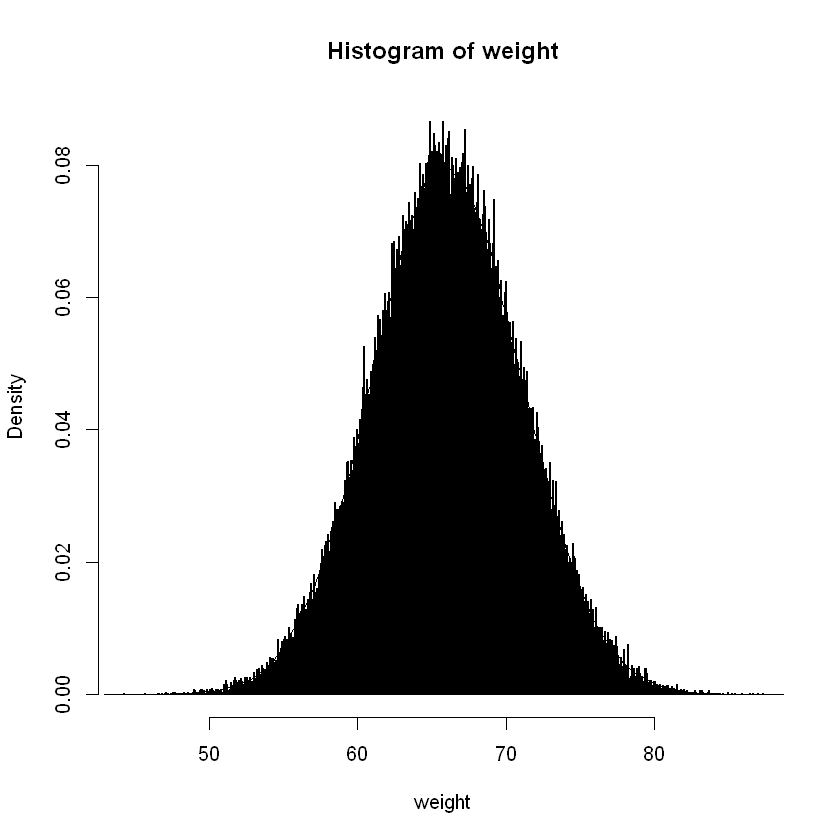

In [7]:
# 표준분포
weight <- rnorm(n = 100000, mean = 66, sd = 5) # 평균 66kg, 표준편차 5
# 히스토그램
hist(weight, breaks = 1000, freq = FALSE)
lines(density(weight))
# 평균을 중심으로 범위 안에 전체 데이터의 약 95%가 존재한다.

In [ ]:
# 귀무 가설(사실이라고 가정하는 상황, H0) : 차이가 없다. (기본 형태)
# 대립 가설(우리가 새로 검증하고 싶은 상황, H1) : 차이가 있다. 
# 가설을 (기각), (채택) 등의 사용 한다.
# 유의 수준 () : 가설 검정할 때 표본 자료에서 얻은 검정 통계량이 기각 구간에
                #들어갈 확률, 즉 오차 가능성 귀무 가설을 기각 하는데 사용됨. 5%
# 유의 확률 (p-value) : 귀무 가설을 지지하는 정도. 유의 확률이 낮을 수록 귀무 가설을 기각 하는데 설득력을 갖는다.
                        # 통계적으로 의미가 있다. 5% 보다 낮으면 나한테 좋다.(내 예기가 맞다. 내 의견을 주장할 수 있다 )


In [8]:
colnames(customer_r) <- tolower(colnames(customer_r))
colnames(reservation_r) <- tolower(colnames(reservation_r))
colnames(order_info_r) <- tolower(colnames(order_info_r))
colnames(item_r) <- tolower(colnames(item_r))

In [9]:
head(customer_r)

customer_id,customer_name,phone_number,email,first_reg_date,sex_code,birth,job,zip_code
W1346506,고객71,010-1111-1181,scust71@sfnb.co.kr,19/09/01,F,19820922,자영업,122100
W1347648,고객72,010-1111-1182,scust72@sfnb.co.kr,19/09/04,M,19940812,학생,140100
W1347756,고객73,010-1111-1183,scust73@sfnb.co.kr,19/09/05,M,19931217,NA,152100
W1347984,고객74,010-1111-1184,scust74@sfnb.co.kr,19/09/06,M,19810822,자영업,130100
W1348303,고객75,010-1111-1185,scust75@sfnb.co.kr,19/09/07,M,19900611,NA,121100
W1348424,고객76,010-1111-1186,scust76@sfnb.co.kr,19/09/08,M,19730422,NA,139100


In [10]:
table(reservation_r$branch)


  강남   강동   강북   강서   관악   광진   구로   금천   노원   도봉 동대문 
    49     18     12     22     15      8     14     10     10      6     20 
  동작   마포 서대문   서초   성동   성북   송파   양천 영등포   용산   은평 
    21     22     20     22     13      4     17     10     17     19     10 
  종로   중구   중랑 
    13     18      6 

In [11]:
# cancel 이 되지 않은 수 보기
no_cancel_data <- reservation_r %>% filter(cancel == "N")
table(no_cancel_data$branch)


  강남   강동   강북   강서   관악   광진   구로   금천   노원   도봉 동대문 
    41     17     12     19     15      8     11      7      8      5     14 
  동작   마포 서대문   서초   성동   성북   송파   양천 영등포   용산   은평 
    18     20     18     17     12      4     15      8     16     18      8 
  종로   중구   중랑 
     7     15      4 

In [12]:
df_f_join_1 <- inner_join(reservation_r, order_info_r, by = "reserv_no")
df_f_join_2 <- inner_join(df_f_join_1, item_r, by = "item_id")

In [13]:
head(df_f_join_2)

reserv_no,reserv_date,reserv_time,customer_id,branch,visitor_cnt,cancel,order_no,item_id,quantity,sales,product_name,product_desc,category_id,price
2019082701,20190827,1800,W1340914,마포,2,N,190827547272110010,M0001,2,48000,SPECIAL_SET,온라인_전용상품,COMBO,24000
2019082602,20190826,1200,W341658,동작,5,N,190826137302710010,M0010,5,30000,JUICE,주스,BEVERAGE,6000
2019082601,20190826,1800,W1328993,강북,4,N,190826137192910010,M0005,4,140000,STEAK,스테이크,FOOD,35000
2019082501,20190825,1800,W1340463,용산,2,N,190825107839310010,M0008,2,20000,SANDWICH,샌드위치,FOOD,10000
2019082401,20190824,1200,W1344912,강동,3,N,190824137844710010,M0006,3,75000,SALAD_BAR,샐러드바,COMBO,25000
2019082301,20190823,1800,W1344753,영등포,2,N,190823107844510010,M0004,1,25000,SEA_FOOD,씨푸드,FOOD,25000


In [17]:
# 강남, 마포, 서초 지점만 선택
df_branch_sales <- df_f_join_2 %>% 
filter(branch == "강남"| branch == "마포" | branch == "서초") %>% 
group_by(branch, product_name) %>% 
summarise(sales_amt = sum(sales)/1000)
df_branch_sales
          

`summarise()` has grouped output by 'branch'. You can override using the `.groups` argument.


branch,product_name,sales_amt
강남,JUICE,66
강남,PASTA,180
강남,PIZZA,204
강남,SALAD,105
강남,SALAD_BAR,200
강남,SANDWICH,20
강남,SEA_FOOD,250
강남,SPECIAL_SET,1416
강남,STEAK,1505
강남,WINE,128
